In [1]:
#import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Convert the CSV File into a Pandas DataFrame. Initially, we run into an issue with encoding, so we change the encoding.
data = pd.read_csv("Speed Dating Data.csv", encoding='iso-8859-1')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# There are 195 columns. We are going to ignore a large portion of these column, so
# we can begin to remove them now.

In [5]:
# We will be removing all columns that involve data entries after the participant has already decided whether or not they are a match with their particpant,
# since this data is irrelevant for the question we want to answer. We want to be able to predict if a person will match with someone solely from the initial speed date they
# have, and the information about themselves that they filled out prior (such as gender, age, field of study, etc.)

#So, remove every column after "amb3_s", since the entries after are after the speed date event.
data = data.iloc[:, :data.columns.get_loc('satis_2')]

In [6]:
# Some columns require altering, particularly for missing data in the columns. There are several ways to handle missing data, and it is context-dependent.
# For the mn_sat column, which marks the median SAT score from the participant's school for undergrad, we will look up the median score back in 2002 to fill the column.
# This column is important because it serves as a measure for overall intelligence. 

In [7]:
sat_map = {'Washington U. in St. Louis': 1469, 'university of wisconsin/la crosse': 1174 ,'HOWARD UNIVERSITY': 1213, 'Cambridge University': 1480, 'Illinois': 1350, 
       'Penn State University': 1265, 'George Washington University': 1370, 'University of Wisconsin-Madison': 1390, 'University of Illinois/Champaign': 1350, 'GW': 1370,
       'University of Chicago': 1520, 'UC Irvine': 1310, 'Cal State Univ.,Long Beach': 1145, 'Washington University in St. Louis': 1469, 'Tufts University': 1465, 
       'University of Rochester': 1420,  'Rice University': 1505, 'washington university in st louis': 1470, 'Tufts': 1465, 'tufts': 1465, 
       'University of the Philippines': 1026, 'UM': 1355, 'Wake Forest': 1390, 'University of Massachusetts-Amherst': 1290, 'Case Western Reserve University': 1435, 
       'Vanderbilt University': 1505, 'University of Kansas': 1240, 'California State University Los Angeles': 985, 'COOPER UNION': 1413, 'Texas State University': 1095,
       'Cooper Union, Bard college, and SUNY Purchase': 1304, 'University of Genova': 1127, 'Oxford University': 1550, 'Oxford': 1550}

In [8]:
# Fill in all missing SAT scores for schools in which we were able to locate SAT score averages
for k in sat_map.keys():
    data.loc[ data['undergra'] == k, 'mn_sat'] = sat_map[k]

In [9]:
# # Replace all NaN values with an empty string, set all values in SAT score to strings, then convert all strings to floats for SAT
# # so we can calculate median score.
data["mn_sat"] = data['mn_sat'].replace(np.nan, '')
data["mn_sat"]= data["mn_sat"].astype(str)
data["mn_sat"] = pd.to_numeric(data["mn_sat"].replace(',','', regex=True), downcast="float")

TypeError: could not convert string to float: '1,070.00'

In [9]:
# Replace NaN values with the SAT median score of the entire population
data["mn_sat"] = data['mn_sat'].replace(np.nan, data["mn_sat"].median())

In [10]:
# Another column we will fill the missing entries of is salary. For this column, we will just calculate the mean salary of all participants and replace all missing 
# salary entries with this mean.
data["income"] = data['income'].replace(np.nan, '')
data["income"]= data["income"].astype(str)
data["income"] = pd.to_numeric(data["income"].replace(',','', regex=True), downcast="float")

In [11]:
data["income"] = data['income'].replace(np.nan, data['income'].mean())

In [12]:
# We want to remove columns such as the id of the participant, ID of their date, zipcode, and some of the categorical data that has already been encoded in numbers for
# us (such as career and field of study in undergrad).

data = data.drop(['iid', 'id', 'idg', 'position', 'positin1', 'partner', 'pid', 'field', 'undergra', 'from', 'zipcode', 'career', 'tuition', 'expnum'], axis = 1)


In [13]:
# There are too many NaN entries from attr1_s column and on. Over half of our rows have missing entries, so we will delete these columns.
print(len(data[pd.isna(data.attr1_s) == False]))

4096


In [14]:
# Deleting columns with too many NaN entries
data = data.iloc[:, :data.columns.get_loc('attr1_s')]  #There are too many NaN entries here - SHOW NUMBERS
# Another example of too many NaNs in the columns
data = data.drop(['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'], axis = 1)

In [15]:
# Delete all entries that have missing values in the participant's impression of their date. The ratings of the participant's date is crucial to our prediction, and it wouldn't
# make sense to replace data with the mean or median if every person's impression can vary greatly (you may really like a particular person, or really not like them).
data = data[pd.isna(data.attr) == False]
data = data[pd.isna(data.sinc) == False]
data = data[pd.isna(data.intel) == False]
data = data[pd.isna(data.fun) == False]
data = data[pd.isna(data.amb) == False]
data = data[pd.isna(data.shar) == False]
data = data[pd.isna(data.like) == False]
data = data[pd.isna(data.prob) == False]
data = data[pd.isna(data.met) == False]

In [16]:
# Delete row containing no go_out (these rows contain lots of NaN values): 
#data = data[pd.isna(data.go_out) == False]

In [17]:
# Another issue we run into: Out of the 21 waves, waves 6-9 use a rating scale of 1-10 for attributes they are rating, as opposed to a 
# 100-point scale, which is used by all of the other waves. So, we will take each rating from wave 6-9 and multiply it by 10, so it fits an
# 100-point scale. This is important for replacing nan attribute values with the median/mean of said attribute.

# It appears that most attributes have been converted to an 100-point scale for waves 6-9, except attr4_1 to shar4_1, so we will adjust those accordingly:
mask = ((data['wave'] >=6) & (data['wave'] <= 9))
waves_6_9 = data[mask]

for i, row in waves_6_9.iterrows():
    data.at[i, 'attr4_1'] = waves_6_9['attr4_1'][i]*10
    data.at[i, 'sinc4_1'] = waves_6_9['sinc4_1'][i]*10
    data.at[i, 'intel4_1'] = waves_6_9['intel4_1'][i]*10
    data.at[i, 'fun4_1'] = waves_6_9['fun4_1'][i]*10
    data.at[i, 'amb4_1'] = waves_6_9['amb4_1'][i]*10
    data.at[i, 'shar4_1'] = waves_6_9['shar4_1'][i]*10

In [19]:
# Delete all rows where entries cannot be replaced by the median. 
not_replaceable = ['race_o', 'met_o', 'field_cd', 'career_c']

for i in not_replaceable:
    data = data[pd.isna(data[i]) == False]
# replace the rest of the columns with their median, if they contain a NaN value:
for col in data.columns:
    data[col] = data[col].replace(np.nan, data[col].median())

In [21]:
# Time to explore the data...

In [22]:
data.head()

,gender,condtn,wave,round,order,match,int_corr,samerace,age_o,race_o,...,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es
30,0,1,1,10,3,0,-0.18,1,27.0,2.0,...,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0,2.0
31,0,1,1,10,2,0,-0.18,1,22.0,2.0,...,8.0,7.0,8.0,10.0,7.0,8.0,8.0,1.0,1.0,2.0
33,0,1,1,10,4,1,-0.18,1,23.0,2.0,...,8.0,10.0,7.0,10.0,7.0,10.0,8.0,10.0,1.0,2.0
34,0,1,1,10,6,0,0.21,0,24.0,3.0,...,6.0,9.0,8.0,9.0,8.0,9.0,7.0,7.0,2.0,2.0
35,0,1,1,10,5,0,0.37,1,25.0,2.0,...,5.0,10.0,8.0,4.0,8.0,2.0,4.0,3.0,2.0,2.0


In [23]:
#Separate males and females into different dataframes, and collect their respective data and targets.

female_df = data[data['gender'] == 0]
male_df = data[data['gender'] == 1]

female_target = np.array(female_df.dec)
female_data = female_df.drop('dec', axis = 1)
female_X, female_y = female_data.to_numpy(), female_target


male_target = np.array(male_df.dec)
male_data = male_df.drop('dec', axis = 1)
male_X, male_y = male_data.to_numpy(), male_target

In [24]:
# Get the input of decisions from the participants in the form of an array, and then remove the targets from the dataset (since we are 
# using our ML model to decide whether the participant will decide "yes" or "no".
target = np.array(data.dec)
data = data.drop('dec', axis = 1)

In [26]:
X, y = data.to_numpy(), target

In [27]:
clf = tree.DecisionTreeClassifier(max_depth = 10, splitter = 'best', criterion = "entropy")
clf = clf.fit(X, y)

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'neg_mean_squared_error']
scores = cross_validate(clf, X, y, scoring=scoring, cv=10)
print("10-fold Cross Validation results for Decision Tree:")
print("%0.2f accuracy for test data" % (np.mean(scores['test_accuracy'])))
print("%0.2f recall for test data" % (np.mean(scores['test_recall_macro'])))
print("%0.2f precision for test data" % (np.mean(scores['test_precision_macro'])))
print("%0.2f mean_squared error for test data" % (np.mean(scores['test_neg_mean_squared_error'])))

10-fold Cross Validation results for Decision Tree:
0.85 accuracy for test data
0.85 recall for test data
0.85 precision for test data
-0.15 mean_squared error for test data


In [28]:
def display_index(arr):
    i = 0
    for a in arr:
        print(str(a)+' index: '+str(i))
        i+=1

In [29]:
# from sklearn.model_selection import train_test_split

# x_train = X[1000:6456]
# x_test = X[0:999]
# y_train = y[1000:6456]
# y_test = y[0:999]


# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier()
# tree.fit(x_train.astype(int), y_train.astype(int))


# from sklearn.metrics import accuracy_score

# y_predicted = tree.predict(x_test.astype(int))
# accuracy_score(y_test.astype(int), y_predicted)

In [30]:
#display_index(data.columns)
#display_index(np.array(clf.feature_importances_))

In [31]:
male_dec = [male_df['dec'].value_counts()[0], male_df['dec'].value_counts()[1]]
female_dec = [female_df['dec'].value_counts()[0], female_df['dec'].value_counts()[1]]

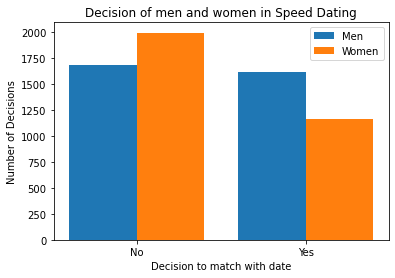

In [32]:

  
X = ['No', 'Yes']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_dec, 0.4, label = 'Men')
plt.bar(X_axis + 0.2, female_dec, 0.4, label = 'Women')
  
plt.xticks(X_axis, X)
plt.xlabel("Decision to match with date")
plt.ylabel("Number of Decisions")
plt.title("Decision of men and women in Speed Dating")
plt.legend()
plt.show()

In [33]:
# Despite a slightly larger amount of men, more women than men decide "No", and are also less likely to say "yes". Men are nearly 50/50 in their
# decision split.

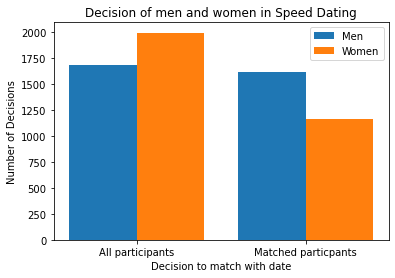

In [34]:

X = ['All participants', 'Matched particpants']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_dec, 0.4, label = 'Men')
plt.bar(X_axis + 0.2, female_dec, 0.4, label = 'Women')
  
plt.xticks(X_axis, X)
plt.xlabel("Decision to match with date")
plt.ylabel("Number of Decisions")
plt.title("Decision of men and women in Speed Dating")
plt.legend()
plt.show()

In [35]:
data['difference_of_age'] = 0
for i, row in data.iterrows():
    data.at[i, 'difference_of_age'] = data['age_o'][i] - data['age'][i]

In [36]:
data['difference_of_age'].mean()

0.06799876084262702

In [37]:
data[data['match'] == 1]['difference_of_age'].mean()

0.10053859964093358

<AxesSubplot:>

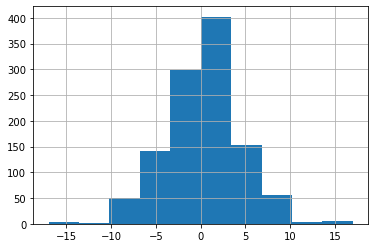

In [38]:
data[data['match'] == 1]['difference_of_age'].hist()

<AxesSubplot:>

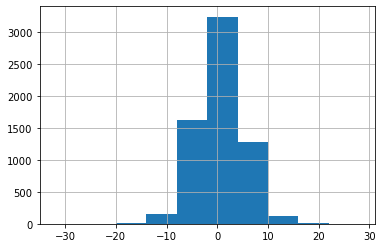

In [39]:
data['difference_of_age'].hist()

In [40]:
stats.ttest_ind(data[data['match'] == 1]['difference_of_age'],
                data['difference_of_age'])

Ttest_indResult(statistic=0.21816494784320625, pvalue=0.8273064769725224)

In [41]:
clf = tree.DecisionTreeClassifier(max_depth = 10, splitter = 'best', criterion = "entropy")
clf = clf.fit(female_X, female_y)

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'neg_mean_squared_error']
scores = cross_validate(clf, female_X, female_y, scoring=scoring, cv=10)
print("10-fold Cross Validation results for Decision Tree:")
print("%0.2f accuracy for test data" % (np.mean(scores['test_accuracy'])))
print("%0.2f recall for test data" % (np.mean(scores['test_recall_macro'])))
print("%0.2f precision for test data" % (np.mean(scores['test_precision_macro'])))
print("%0.2f mean_squared error for test data" % (np.mean(scores['test_neg_mean_squared_error'])))

10-fold Cross Validation results for Decision Tree:
0.82 accuracy for test data
0.81 recall for test data
0.81 precision for test data
-0.18 mean_squared error for test data


In [42]:
#display_index(female_data.columns)
#display_index(np.array(clf.feature_importances_))

In [43]:
female_feature_arr = clf.feature_importances_
female_dict = dict()
index = 0
for col in female_data.columns:
    female_dict[col] = female_feature_arr[index]
    index+=1
female_arr = sorted(female_dict.items(), key=lambda x: x[1])
female_arr[-5:]

[('attr', 0.018140123181896273),
 ('match_es', 0.01865826177992075),
 ('like', 0.1304445491531311),
 ('dec_o', 0.19799225887603308),
 ('match', 0.34756268427350734)]

In [44]:
clf = tree.DecisionTreeClassifier(max_depth = 10, splitter = 'best', criterion = "entropy")
clf = clf.fit(male_X, male_y)

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'neg_mean_squared_error']
scores = cross_validate(clf, male_X, male_y, scoring=scoring, cv=10)
print("10-fold Cross Validation results for Decision Tree:")
print("%0.2f accuracy for test data" % (np.mean(scores['test_accuracy'])))
print("%0.2f recall for test data" % (np.mean(scores['test_recall_macro'])))
print("%0.2f precision for test data" % (np.mean(scores['test_precision_macro'])))
print("%0.2f mean_squared error for test data" % (np.mean(scores['test_neg_mean_squared_error'])))

10-fold Cross Validation results for Decision Tree:
0.80 accuracy for test data
0.80 recall for test data
0.81 precision for test data
-0.20 mean_squared error for test data


In [45]:
#display_index(male_data.columns)
#display_index(np.array(clf.feature_importances_))

In [46]:
male_feature_arr = clf.feature_importances_
male_dict = dict()
index = 0
for col in male_data.columns:
    male_dict[col] = male_feature_arr[index]
    index+=1

In [47]:
male_arr = sorted(male_dict.items(), key=lambda x: x[1])

In [48]:
male_arr[-10:]

[('amb4_1', 0.01060182464500905),
 ('prob', 0.010660350540355528),
 ('sinc', 0.010762695992697925),
 ('intel1_1', 0.012943679185915777),
 ('sinc4_1', 0.017371317327657225),
 ('match_es', 0.02071325787638031),
 ('attr', 0.04999440903676002),
 ('like', 0.19399296677366365),
 ('dec_o', 0.21397548727021637),
 ('match', 0.25566218142776953)]

In [49]:
male_attributes_top5 = [i[0] for i in male_arr[-5:]]
female_attributes_top5 = [i[0] for i in female_arr[-5:]]

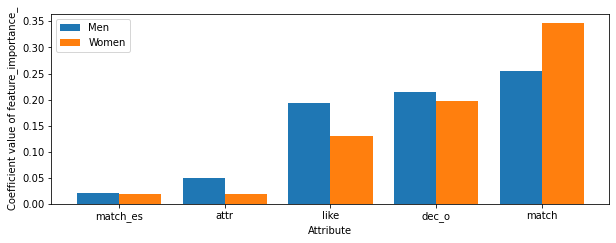

In [51]:

plt.rcParams["figure.figsize"] = [10, 3.50]
X_axis = np.arange(len(male_attributes_top5))
plt.bar(X_axis- 0.2 , [i[1] for i in male_arr[-5:]], 0.4, label = 'Men')
X_axis = np.arange(len(female_attributes_top5))
plt.bar(X_axis+ 0.2 , [i[1] for i in female_arr[-5:]], 0.4, label = 'Women')
plt.xticks(X_axis, male_attributes_top5)
plt.xlabel("Attribute")
plt.ylabel("Coefficient value of feature_importance_")
plt.legend()
plt.show()